In [1]:
from optiwindnet.api import WindFarmNetwork, Heuristic
import numpy as np

cables = [(None, 3, 206), (None, 5, 287), (None, 7, 406)]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
border = np.array( # vertices oriented counter-clockwise
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
# 'obstacles' is an optional location attribute
obstacles = [
    # - vertices oriented clockwise for each obstacle polygon
    # - obstacles must be strictly inside the extents polygon
    # - undefined behavior if obstacles and extents borders overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


In [2]:
wfn = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables)

router = Heuristic(wfn=wfn, solver='EW') # default is EW
router()
grad_wt, grad_ss = router.gradient()
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

[(11, 10, {'length': 474.6472374300729, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 97777.33091059502}), (-1, 4, {'length': 625.9792328823696, 'load': 5, 'reverse': False, 'cable': 1, 'cost': 179656.03983724007}), (-1, 6, {'length': 629.3369526732083, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 255510.80278532256}), (-1, 5, {'length': 390.041023483428, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 80348.45083758616}), (3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length': 445.05505277437305, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 91681.34087152085}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'length': 336.609566114

In [3]:
substations = np.array([[695, 1060],], dtype=float)
router(turbines=turbines, substations=substations)
print(wfn.cost())
#print(wfn.G.graph['VertexC'][-substations.shape[0]:, :])
grad_wt, grad_ss = router.gradient()
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())


1438566.1977794454
[(11, 10, {'length': 474.6472374300729, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 97777.33091059502}), (-1, 4, {'length': 628.0286617663241, 'load': 5, 'reverse': False, 'cable': 1, 'cost': 180244.22592693503}), (-1, 6, {'length': 626.4096103988188, 'load': 6, 'reverse': False, 'cable': 2, 'cost': 254322.30182192044}), (-1, 5, {'length': 391.6758864163072, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 80685.23260175929}), (3, 4, {'length': 563.8794197343967, 'load': 4, 'reverse': True, 'cable': 1, 'cost': 161833.39346377185}), (3, 1, {'length': 552.9647366695276, 'load': 3, 'reverse': True, 'cable': 0, 'cost': 113910.7357539227}), (0, 1, {'length': 424.471436023674, 'load': 1, 'reverse': True, 'cable': 0, 'cost': 87441.11582087685}), (2, 1, {'length': 445.05505277437305, 'load': 1, 'reverse': False, 'cable': 0, 'cost': 91681.34087152085}), (8, 10, {'length': 415.12046444375636, 'load': 3, 'reverse': False, 'cable': 0, 'cost': 85514.8156754138}), (8, 6, {'le

In [4]:
substations = np.array([[700, 1050],], dtype=float)
grad_wt, grad_ss = router.gradient(turbines=turbines, substations=substations)

[(11, 10, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}), (-1, 4, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}), (-1, 6, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}), (-1, 5, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}), (3, 4, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}), (3, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}), (0, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}), (2, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False,

In [5]:

print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

gradients_wt
 [[   9.70618904 -205.77120764]
 [   0.            0.        ]
 [-205.97451805   -3.2400486 ]
 [ 255.86790133  180.36510604]
 [   0.            0.        ]
 [   0.            0.        ]
 [-127.67235372  161.66561198]
 [   0.            0.        ]
 [ -15.58364377 -340.42274323]
 [ -50.69989847 -199.66351769]
 [   0.            0.        ]
 [ -49.04273777  200.07700985]]
gradients_ss
 [[-156.3601524   134.58190589]]

cost:  1436402.1337653387


<Axes: >

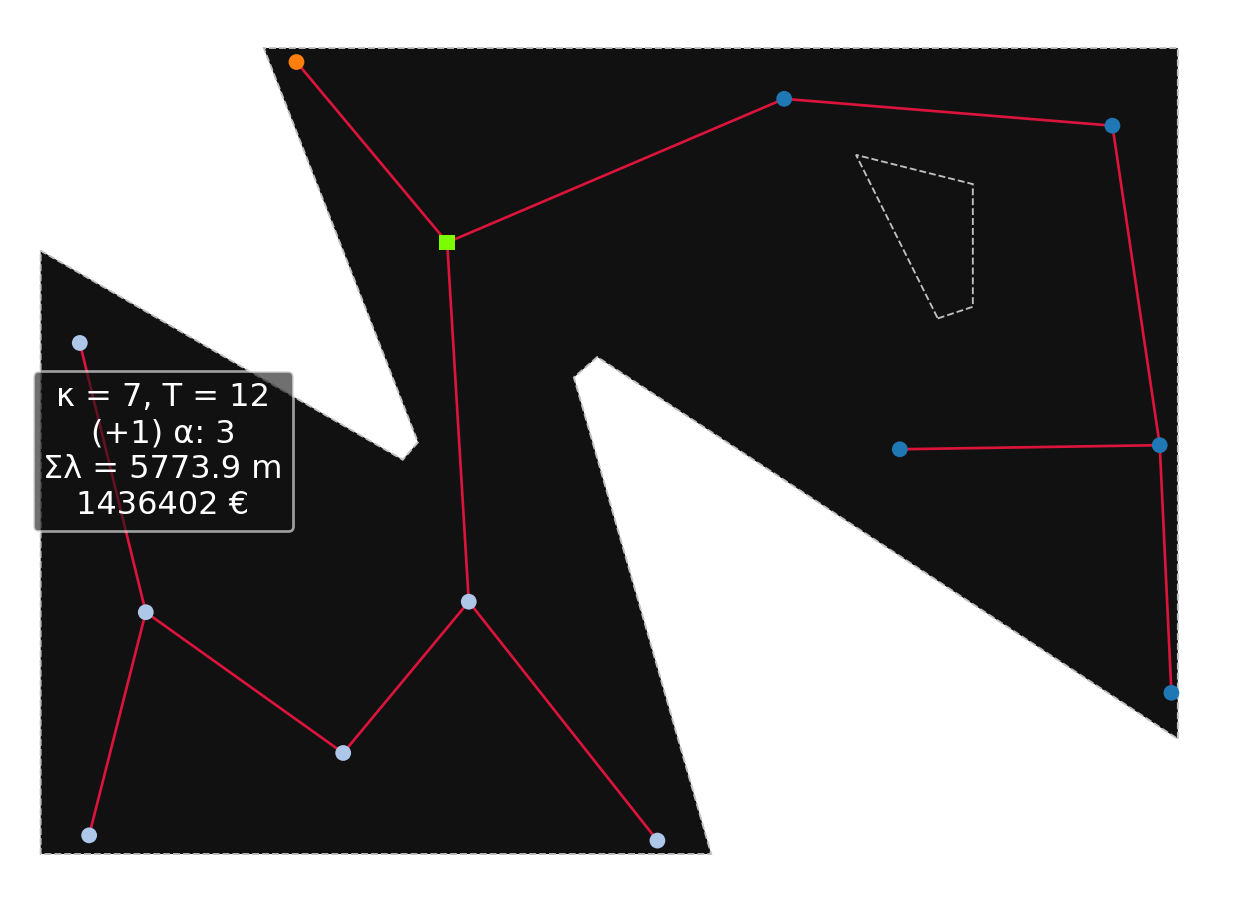

In [6]:
wfn.get_network()
wfn.plot()

In [7]:
New_network = [(1, 1, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}),
               (1, 1, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}),
               (1, 1, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}),
               (1, 1, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}),
               (1, 1, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}),
               (1, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}),
               (1, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}),
               (1, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(91681.34087152085)}),
               (1, 1, {'length': np.float64(415.12046444375636), 'load': 3, 'reverse': False, 'cable': 0, 'cost': np.float64(85514.8156754138)}),
               (1, 1, {'length': np.float64(336.60956611480907), 'load': 4, 'reverse': False, 'cable': 1, 'cost': np.float64(96606.9454749502)}),
               (1, 1, {'length': np.float64(394.12307722334657), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(81189.35390800939)}),
               (1, 1, {'length': np.float64(521.1621628629615), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(107359.40554977008)})]
#wfn.G.edges()
#wfn.set_network(network_tree=New_network)
#wfn.plot()
grad_wt, grad_ss = router.gradient(network_tree=New_network)



[(1, 1, {'length': np.float64(0.0), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(0.0)})]


In [8]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())


gradients_wt
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
gradients_ss
 [[0. 0.]]

cost:  0.0


In [9]:
wfn.set_network(network_tree=New_network)
wfn.get_network()


EdgeDataView([(1, 1, {'length': np.float64(0.0), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(0.0)})])

In [10]:
grad_wt, grad_ss = router.gradient()
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

[(1, 1, {'length': np.float64(0.0), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(0.0)})]
gradients_wt
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
gradients_ss
 [[0. 0.]]

cost:  0.0


<Axes: >

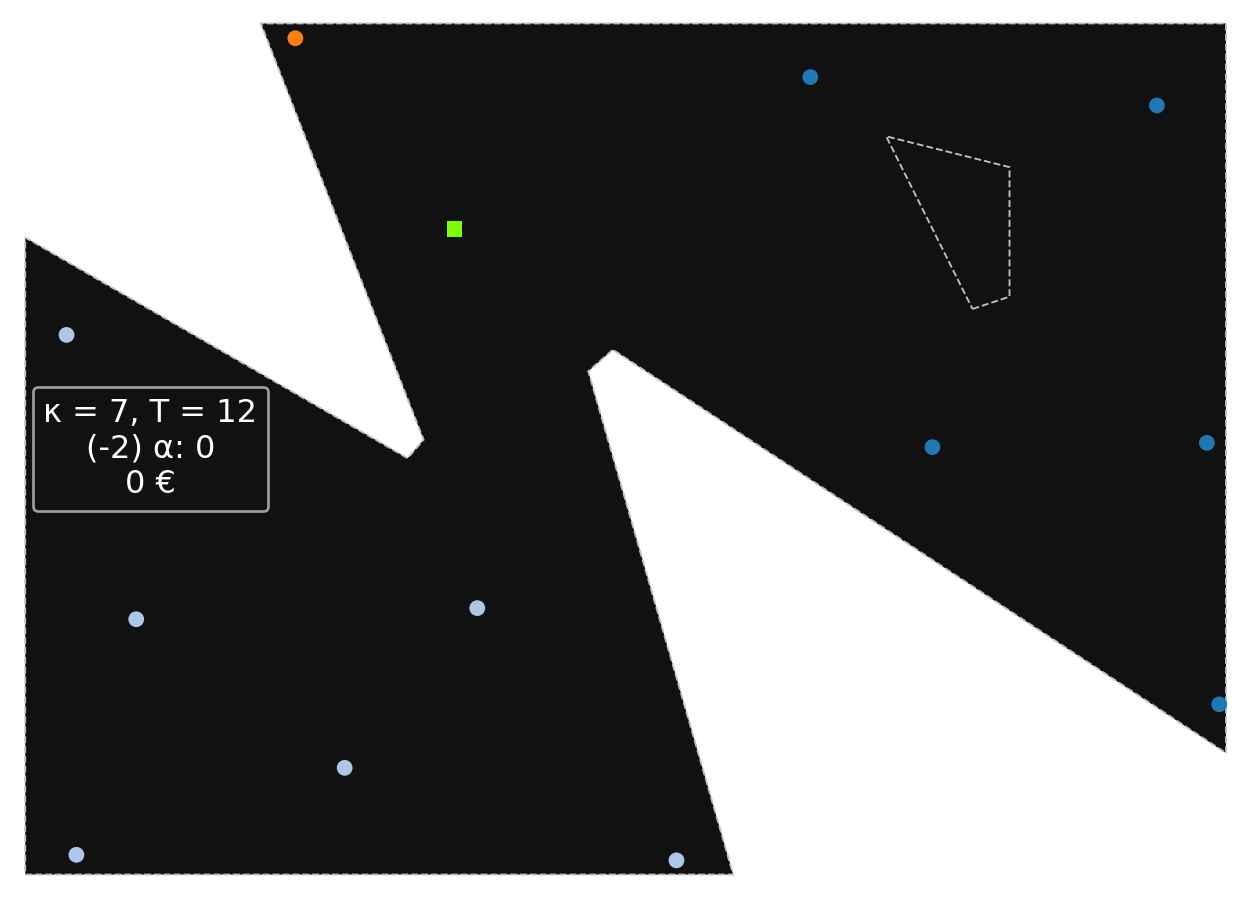

In [11]:
wfn.plot()